#LAB 9 : Dimensionality Reduction

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

#PCA

Text(0.5, 1.0, 'distribution in y direction')

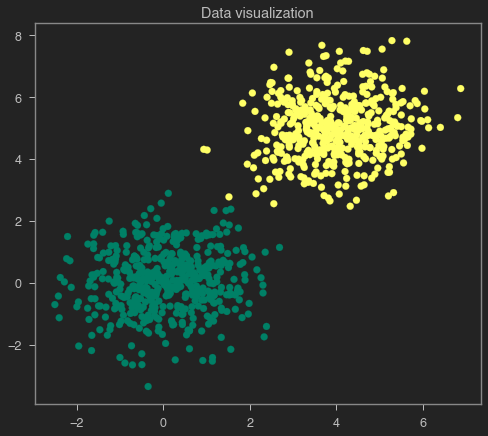

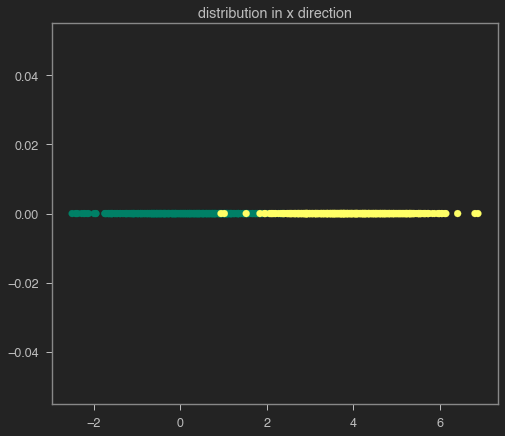

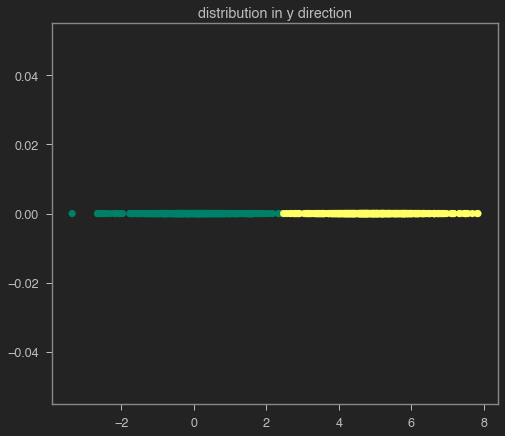

In [2]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label,cmap='summer')
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in y direction')

Text(0.5, 1.0, 'Data visualization')

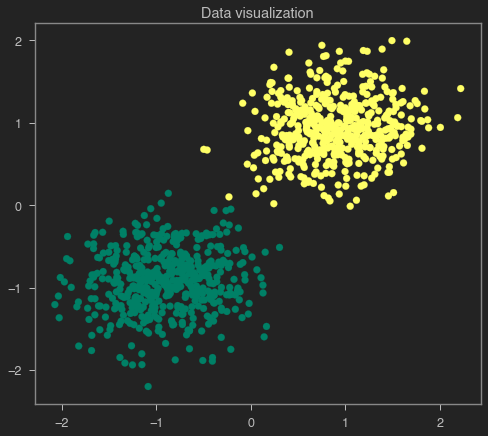

In [3]:
# Data normalization

# Perform data normalization here using mean substraction and std division
## Write your code here

mean = np.mean(data,axis=0)
std = np.std(data,axis=0)
#print(std)
data = (data-mean)/std
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label,cmap = 'summer')
plt.title('Data visualization')



variance along pca1 direction= 1.8477663843459717
variance along pca2 direction= 0.15223361565402696


Text(0.5, 1.0, 'distribution in pca2 direction')

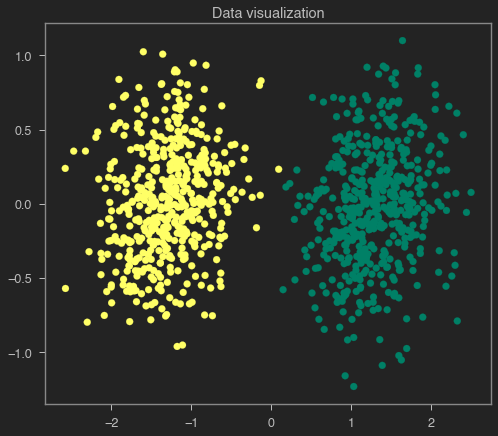

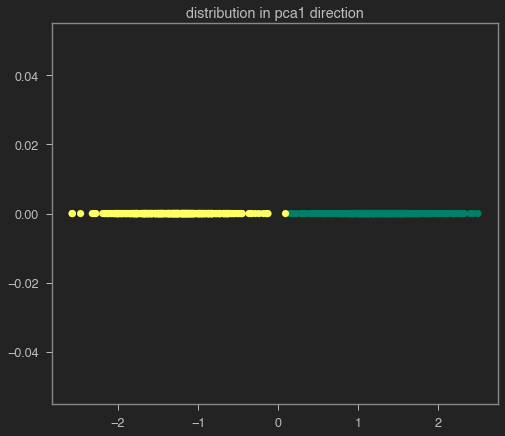

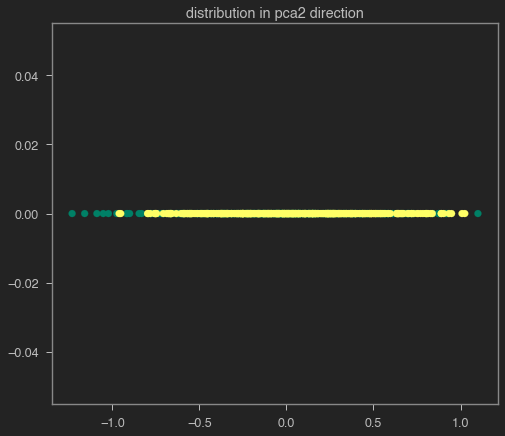

In [4]:
# PCA

# coverance matrix
cov=data.T @ data


# using sigular value decomposition
u,s,v=np.linalg.svd(cov)

trans_data=data.dot(u)## Write your code here

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label,cmap='summer')
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in pca2 direction')

In [5]:
class pca:
# Constructor
    def __init__(self, name='reg',data=None,retain_dim=None):
        self.name = name # Create an instance variable
        self.data=data
        self.retain_dim=retain_dim if retain_dim is not None else self.ret_dim(self.data)
    # compute pca transform value
    def pca_comp(self,data):
        data=self.pre_process(data)
        cov=data.T @ data # insert your code here
        u,_,_=np.linalg.svd(cov) # singular value decomposition
        u_req=u[:,:self.retain_dim]# insert your code here
        trans_data=data.dot(u_req)# insert your code here
        return trans_data,u_req
    # compute the required retain dimension
    def ret_dim(self,data):
        data=self.pre_process(data)
        cov=data.T @ data
        u,s,v=np.linalg.svd(cov)
        # insert your code here # can also take 90%
        var = 0.0
        t_var = np.sum(np.square(s))
        for i in range(s.shape[0]):
            var = np.sum(np.square(s[:i]))
            if (var >= 0.9*t_var):
                break
        return i
    def pre_process(self,data):
        data1=(data-np.mean(data,axis=0))
        data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
        return data

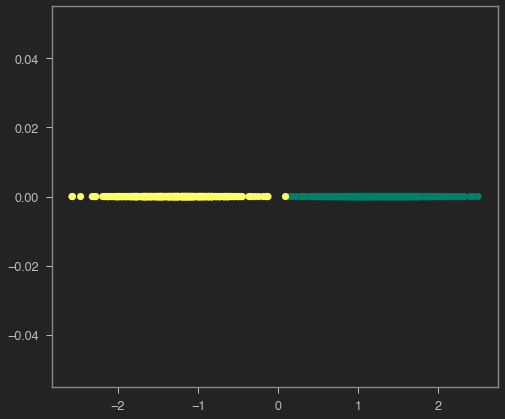

In [6]:
# pca transformation
PCA=pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label,cmap='summer')

In [7]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)


KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


##PCA on MNIST

In [8]:
!pip install idx2numpy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


(100, 784)
(100,)


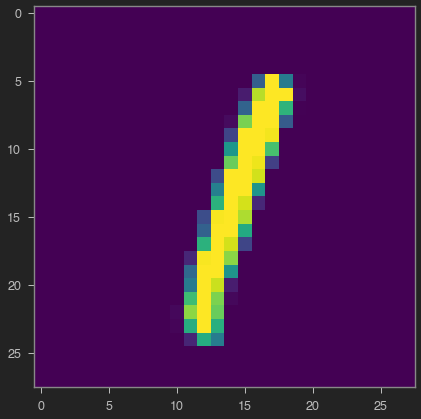

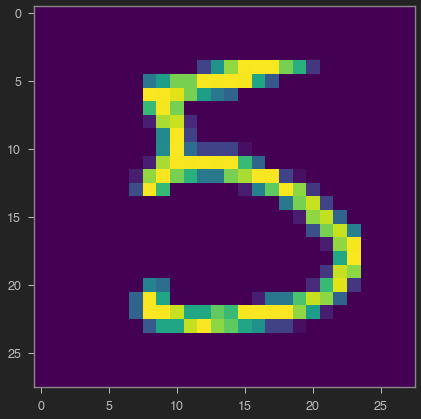

In [9]:
# MNIST data

file1='/Users/kushagrakhatwani/Downloads/t10k-images-idx3-ubyte (1)' ## Change the path accordingly
file2='/Users/kushagrakhatwani/Downloads/t10k-labels-idx1-ubyte (1)' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255



Initial data dimension= 784
Retained dimesion after PCA= 10
KNN Training accuracy = 100.0
(50, 28, 28)
KNN Testing accuracy = 98.0


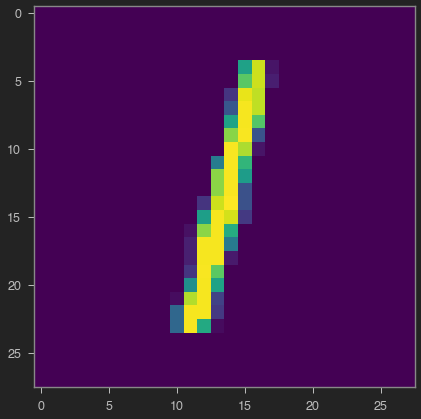

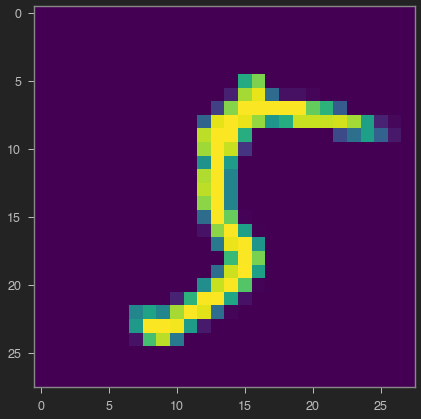

In [10]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1,:,:]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5,:,:]
lab_5=labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


**Perform PCA on MNIST and Classify taking the data with any 3 Classes**

(150, 784)
(150,)


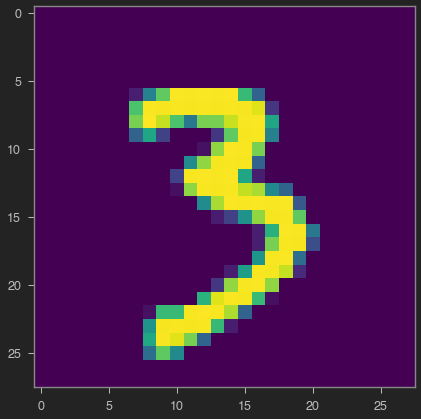

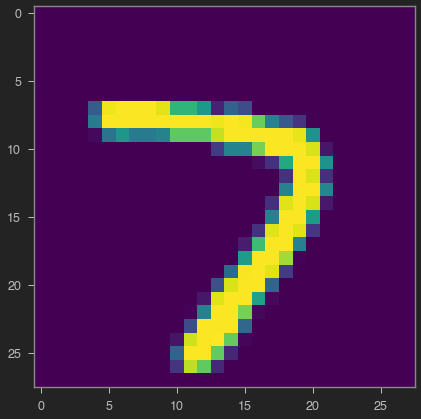

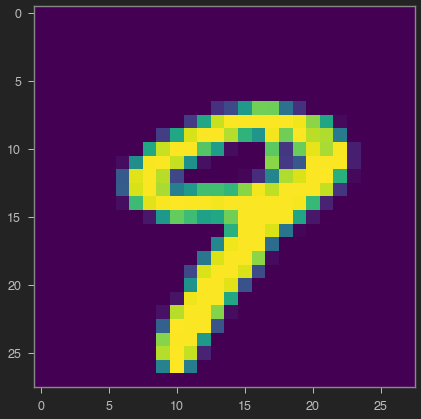

In [11]:
## Write your code here
file1='/Users/kushagrakhatwani/Downloads/t10k-images-idx3-ubyte (1)' ## Change the path accordingly
file2='/Users/kushagrakhatwani/Downloads/t10k-labels-idx1-ubyte (1)' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[3,7,9]

# for class 3

id_3=np.where(labels==cl[0])
id3=id_3[0]
id3=id3[:50]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

# for class 7
id_7=np.where(labels==cl[1])
id7=id_7[0]
id7=id7[:50]
Im_7=Images[id7,:,:]
lab_7=labels[id7]

# for class 9
id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[:50]
Im_9=Images[id9,:,:]
lab_9=labels[id9]

plt.imshow(Im_3[1,:,:])
plt.figure()
plt.imshow(Im_7[1,:,:])
plt.figure()
plt.imshow(Im_9[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_3,Im_7,Im_9))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_3,lab_7,lab_9))
print(G_lab.shape)

data = data.astype('float32')

data /= 255

Initial data dimension= 784
Retained dimesion after PCA= 16
KNN Training accuracy = 94.0
KNN Testing accuracy = 85.33333333333334


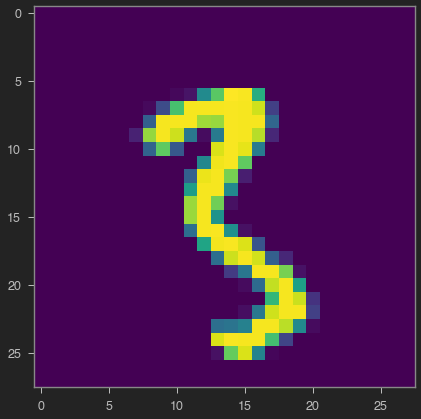

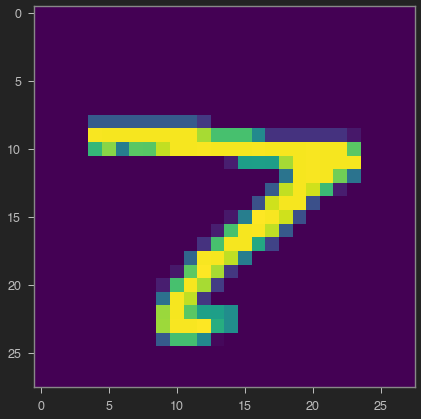

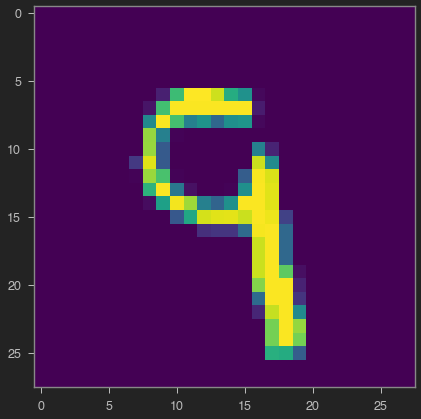

In [12]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)

trans_data,trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_3=np.where(labels==cl[0])
id3=id_3[0]
id3=id3[100:150]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

id_7=np.where(labels==cl[1])
id7=id_7[0]
id7=id7[100:150]
Im_7=Images[id7,:,:]
lab_7=labels[id7]

id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[100:150]
Im_9=Images[id9,:,:]
lab_9=labels[id9]

plt.imshow(Im_3[1,:,:])
plt.figure()
plt.imshow(Im_7[1,:,:])
plt.figure()
plt.imshow(Im_9[1,:,:])


data_tst=np.concatenate((Im_3,Im_7,Im_9))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_3,lab_7,lab_9))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)

#LDA

Text(0.5, 1.0, 'distribution in y direction')

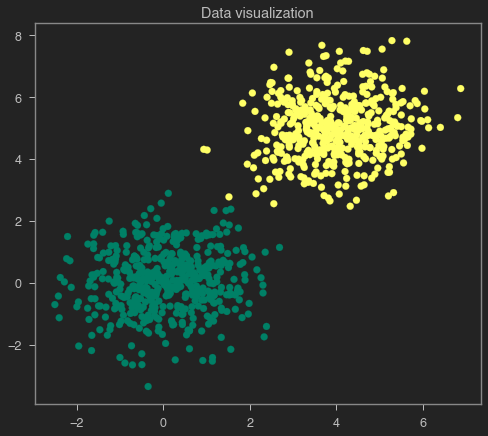

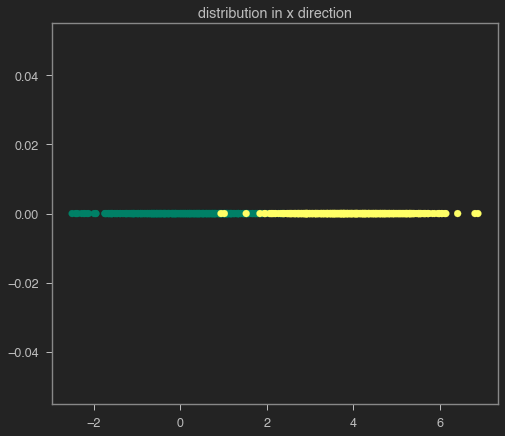

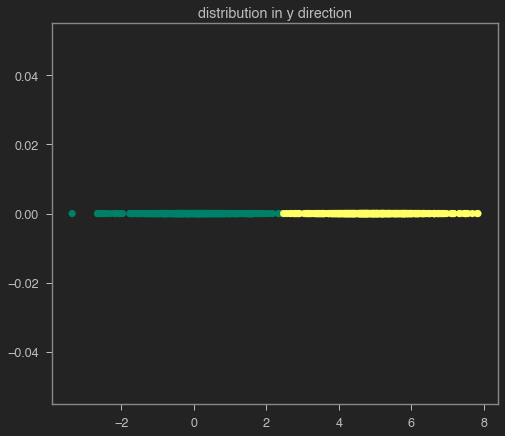

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label,cmap='summer')
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in y direction')

In [14]:
# perform 2-class and m-class LDA
def LDA(X,y):
    target_classes = np.unique(y)
     
    mean_vectors = []

    for cls in target_classes:
        if target_classes.size > 1:
            mean_vectors.append(np.mean(X[y == cls], axis=0))
        else:
            mean_vectors.append(np.mean(X, axis=0))
    data_mean = np.mean(X, axis=0).reshape(1, X.shape[1])

    B = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == i].shape[0]
        mean_vec = mean_vec.reshape(1, X.shape[1])
        mu1_mu2 = mean_vec - data_mean
        B += n * np.dot(mu1_mu2.T, mu1_mu2)
    s_matrix = []

    for cls, mean in enumerate(mean_vectors):
        Si = np.zeros((X.shape[1], X.shape[1]))
        for row in X[y == cls]:
            t = (row - mean).reshape(1, X.shape[1])
            Si += np.dot(t.T, t)
        s_matrix.append(Si)
    S = np.zeros((X.shape[1], X.shape[1]))
    for s_i in s_matrix:
        S += s_i
    S_inv = np.linalg.pinv(S)
    S_inv_B = S_inv.dot(B)
    eig_vals, eig_vecs = np.linalg.eig(S_inv_B)
    eigen_values_sorted = np.argsort(eig_vals)
#     max_eig = eigen_values_sorted[1]
#     min_eig = eigen_values_sorted[0]
    return eig_vecs


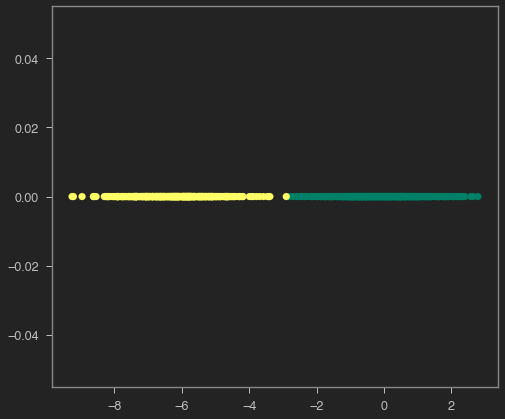

In [15]:
# after LDA projection

w=LDA(data,label)
plt.figure()
plt.scatter(data @ w[0,:],np.zeros(data.shape[0]),c=label,cmap='summer')


In [16]:
# Classification using :DA
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

## Write your code here
LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)
print('KNN Training accuracy =',knn.score(LDA_data,label)*100)
# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data_tst=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('KNN Testing accuracy =', knn.score(data_tst@ w[:],tst_label)*100)

KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


##LDA Multiclass

Text(0.5, 1.0, 'distribution in y direction')

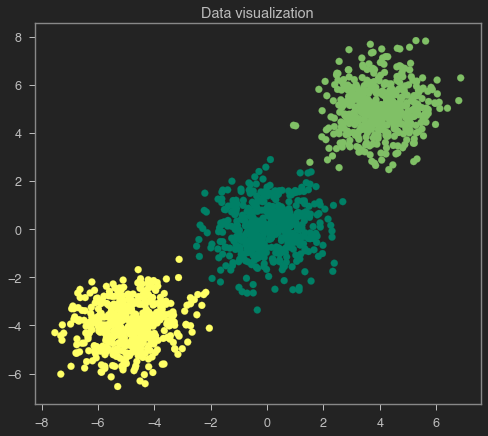

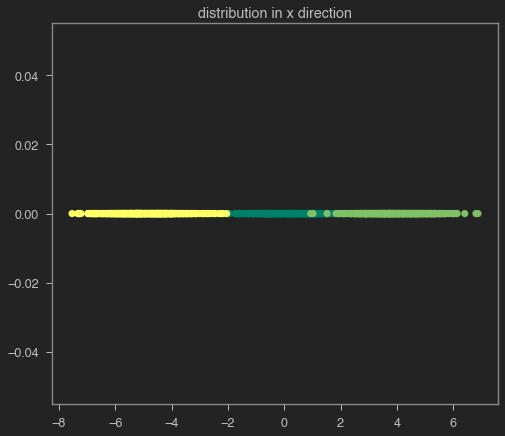

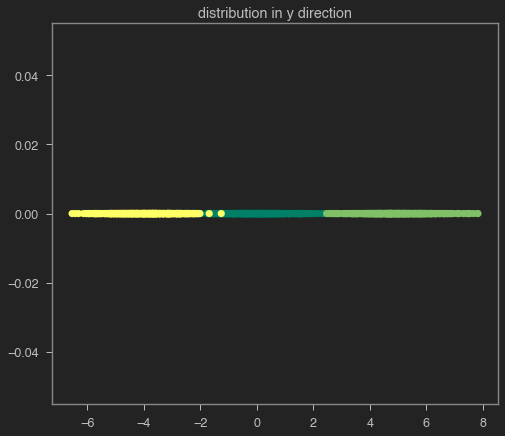

In [17]:
mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label,cmap='summer')
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label,cmap='summer')
plt.title('distribution in y direction')


(2, 2)


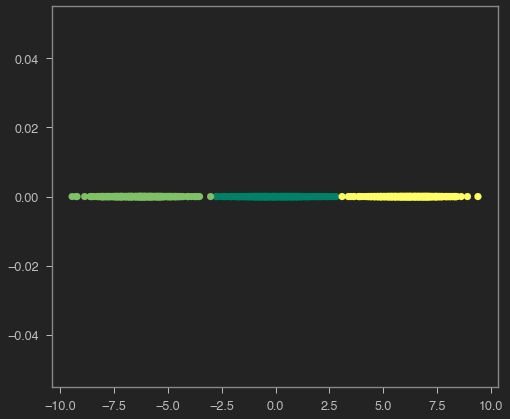

In [18]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[0,:],np.zeros(data.shape[0]),c=label,cmap='summer') # by performing 1D projection

In [19]:
# Testing (using KNN)
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

## Write your code here
LDA_data= data @ w
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(LDA_data, label)
print('KNN Training accuracy =',knn.score(LDA_data,label)*100)
# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data_tst=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('KNN Testing accuracy =', knn.score(data_tst@ w[:],tst_label)*100)

KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


**Perform LDA on MNIST and Classify using the data of any 3 classes**

(2100, 784)
(2100,)


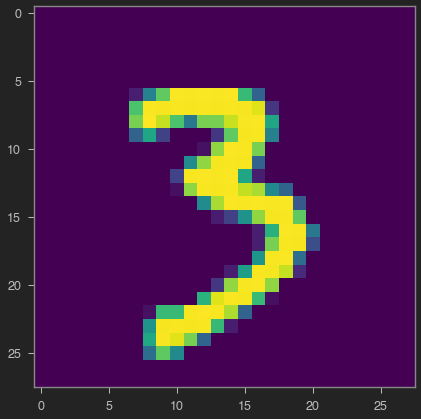

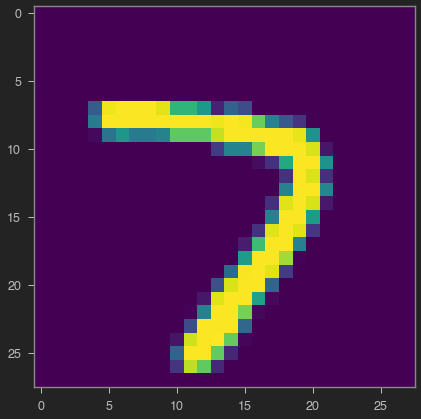

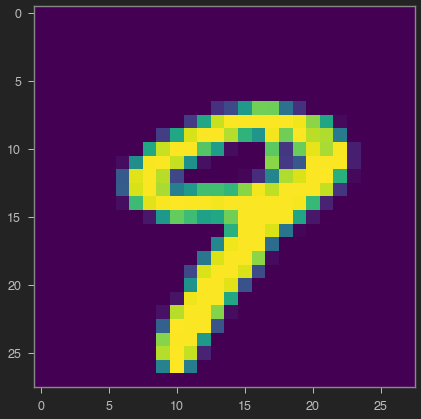

In [20]:
## Write your code here
file1='/Users/kushagrakhatwani/Downloads/t10k-images-idx3-ubyte (1)' ## Change the path accordingly
file2='/Users/kushagrakhatwani/Downloads/t10k-labels-idx1-ubyte (1)' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[3,7,9]

# for class 3

id_3=np.where(labels==cl[0])
id3=id_3[0]
id3=id3[0:700]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

# for class 7
id_7=np.where(labels==cl[1])
id7=id_7[0]
id7=id7[0:700]
Im_7=Images[id7,:,:]
lab_7=labels[id7]

# for class 9
id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[0:700]
Im_9=Images[id9,:,:]
lab_9=labels[id9]

plt.imshow(Im_3[1,:,:])
plt.figure()
plt.imshow(Im_7[1,:,:])
plt.figure()
plt.imshow(Im_9[1,:,:])

#print(Im_5.shape)

data=np.concatenate((Im_3,Im_7,Im_9))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_3,lab_7,lab_9))
print(G_lab.shape)

data = data.astype('float32')

data /= 255

KNN Training accuracy = 98.38095238095238
KNN Testing accuracy = 93.33333333333333


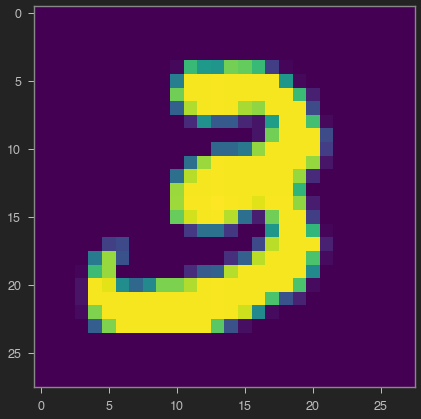

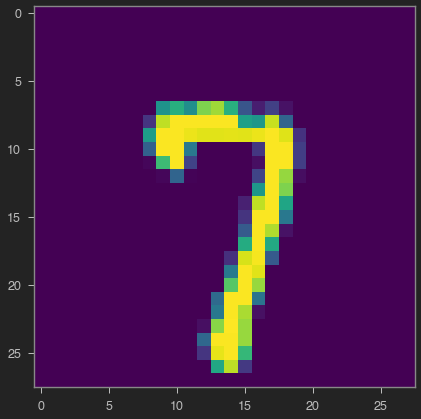

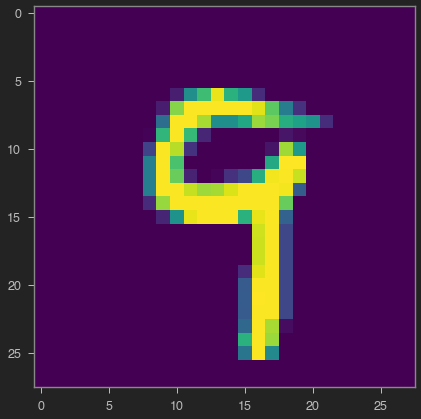

In [21]:
w=LDA(data,G_lab)
trans_data= data @ w[:,0:550] 
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_3=np.where(labels==cl[0])
id3=id_3[0]
id3=id3[700:750]
Im_3=Images[id3,:,:]
lab_3=labels[id3]

id_7=np.where(labels==cl[1])
id7=id_7[0]
id7=id7[700:750]
Im_7=Images[id7,:,:]
lab_7=labels[id7]

id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[700:750]
Im_9=Images[id9,:,:]
lab_9=labels[id9]

plt.imshow(Im_3[1,:,:])
plt.figure()
plt.imshow(Im_7[1,:,:])
plt.figure()
plt.imshow(Im_9[1,:,:])


data_tst=np.concatenate((Im_3,Im_7,Im_9))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))
tst_lab=np.concatenate((lab_3,lab_7,lab_9))

# final testing
print('KNN Testing accuracy =',knn.score(data_tst@ w[:,0:550],tst_lab)*100)